In [1]:
# Allow display of images
from IPython.display import display, Image

# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import signal

import pandas as pd

# Tools from brainsignal library
import os
import sys
path=r'C:\Users\Hamon\Documents\Stage\brainsignal'
sys.path.append(path)
import brainsignal.datageneration as dg
import brainsignal.datanalysis as da
import brainsignal.HRVanalysis as ha

# This makes the plots appear inside the notebook
%matplotlib inline

In [2]:
rep='../../output/'
patientdir='ID_1'
study='window5min'
file=glob.glob(rep+patientdir+study+'ICP.txt', recursive=True)[0]

data=pd.read_csv(file, decimal='.', delimiter='\t')

In [3]:
data

#time  Heart frequency ICP (Hz)  Power hr ICP (ms2)  \
0       180.0                  0.983317          10310000.0   
1       240.0                  0.983317           9580000.0   
2       300.0                  0.953317           9579000.0   
3       360.0                  0.943318          12730000.0   
4       420.0                  0.943318          10870000.0   
...       ...                       ...                 ...   
1263  75960.0                  1.073315          16750000.0   
1264  76020.0                  1.073315          12450000.0   
1265  76080.0                  1.076649          11050000.0   
1266  76140.0                  1.076649           8368000.0   
1267  76200.0                  1.163314           5949000.0   

      Respiratory frequency mean (Hz)  Respiratory frequency std (Hz)  \
0                            0.241265                        0.044802   
1                            0.278702                        0.037897   
2                            0.220466                        0.024609   
3                            0.228785                        0.007205   
4                            0.257903                        0.038125   
...                               ...                             ...   
1263                         0.245424                        0.044608   
1264                         0.249584                        0.058828   
1265                         0.220466                        0.058088   
1266                         0.291181                        0.059413   
1267                         0.262063                        0.050434   

      Mean ICP (mmHg)  STD ICP (mmHg)  Mean AMP (mmHg)  STD AMP (mmHg)  \
0             -7.4790           6.446            3.213          0.4139   
1             -8.8740           1.543            3.258          0.3828   
2             -8.9210           1.516            3.240          0.3601   
3             -8.8560           1.638            3.199          0.3941   
4             -8.9950           1.572            3.129          0.3566   
...               ...             ...              ...             ...   
1263           2.6580           3.831            3.564          0.6696   
1264           0.9026           2.921            3.354          0.5591   
1265          -0.1783           1.752            3.217          0.4966   
1266          -0.4884           1.403            3.053          0.3309   
1267          -0.7345           1.358            3.033          0.3320   

      Psys ICP mean (mmHg)  ...  Pdia STD ICP  (mmHg)    Slope  Error slope  \
0                   -5.984  ...                6.5630  0.05456       11.400   
1                   -7.022  ...                1.0900  0.06501        9.076   
2                   -7.091  ...                1.0260  0.07239        8.597   
3                   -7.060  ...                1.2170  0.06787        9.705   
4                   -7.245  ...                1.2260  0.04484        9.193   
...                    ...  ...                   ...      ...          ...   
1263                 4.708  ...                3.4840  0.20270       15.690   
1264                 2.872  ...                2.5670  0.18340       14.530   
1265                 1.687  ...                1.4600  0.20800       10.800   
1266                 1.247  ...                0.9493  0.11610        7.675   
1267                   NaN  ...                   NaN      NaN          NaN   

      Intercept  rvalue    pvalue  std err  time normalized  \
0         3.711  0.2248  0.255100  0.04674         -40077.0   
1         3.893  0.2140  0.244300  0.05213         -40017.0   
2         3.999  0.2389  0.225200  0.05654         -39957.0   
3         3.921  0.1950  0.444500  0.05602         -39897.0   
4         3.615  0.1427  0.361400  0.04526         -39837.0   
...         ...     ...       ...      ...              ...   
1263      3.116  0.3486  0.156400  0.05733          35703.0   
1264      3.673  0.2671  0.29010

### Filter 

We apply the same filter than for ABP features to get only values where the signal is right.

In [4]:
rep='../../output/'
patientdir='ID_1'
study_name='widow5min'
file=glob.glob(rep+patientdir+study_name+'ABP.txt', recursive=True)[0]

data2=pd.read_csv(file, decimal='.', delimiter='\t')

filt=np.where((np.abs(data2['Heart frequency (Hz)']-(1/(data2['Mean RR (ms)']*1e-3)))/data2['Heart frequency (Hz)']*100)<5)[0]


In [5]:
variables=data.columns[1:]

<ipython-input-172-bc1ebfc96cd4>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


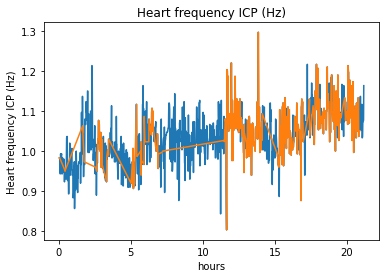

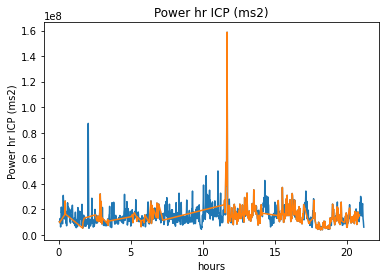

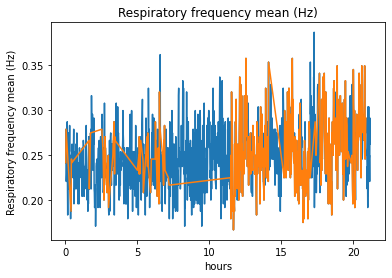

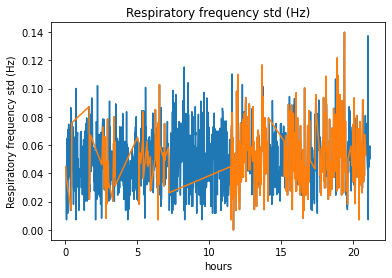

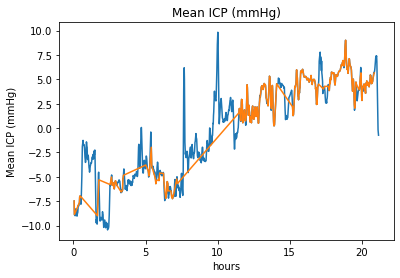

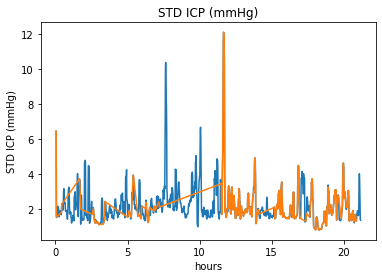

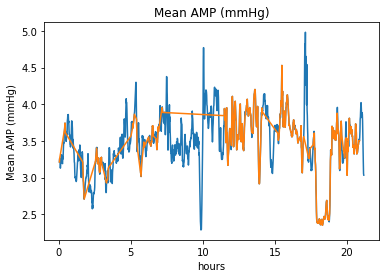

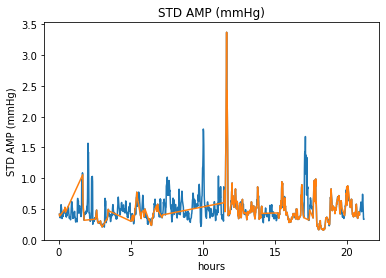

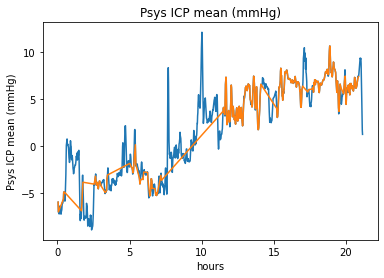

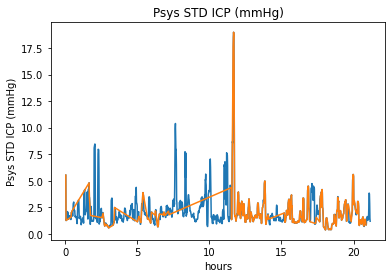

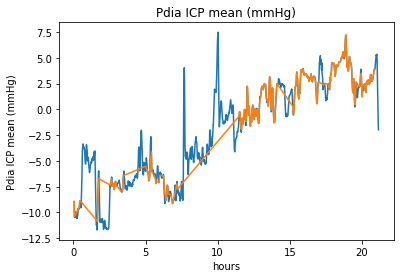

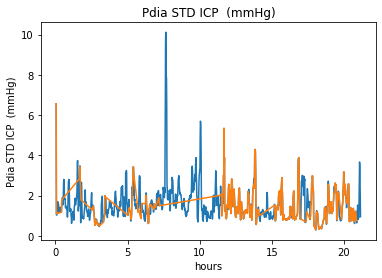

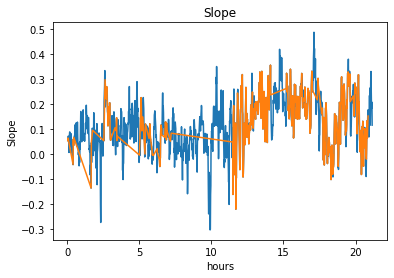

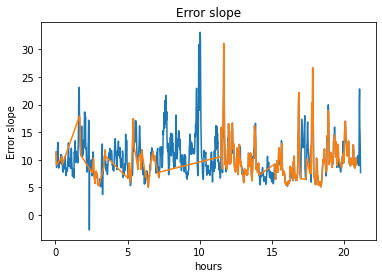

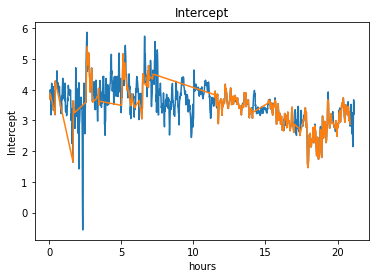

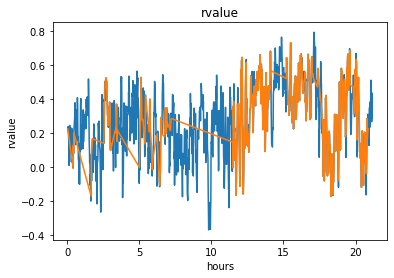

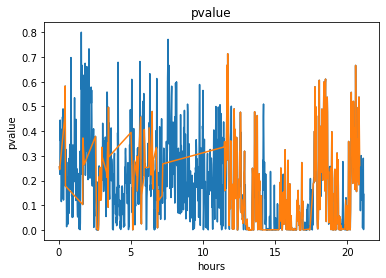

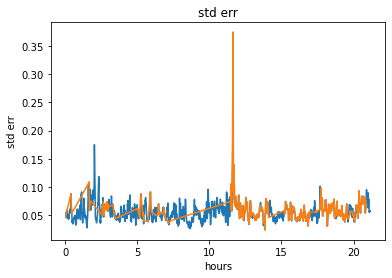

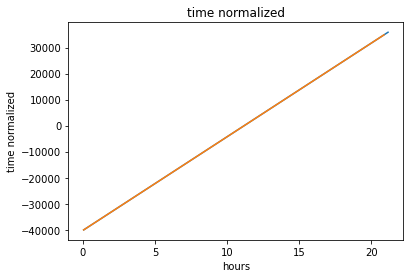

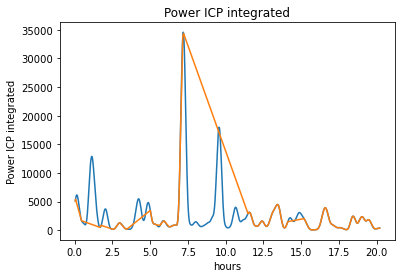

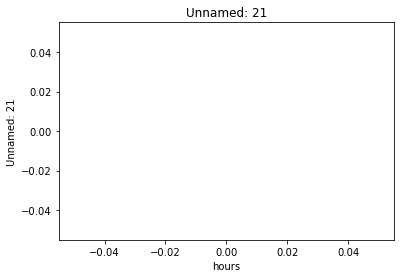

In [172]:
for var in variables :
    data[var]
    plt.figure()
    plt.plot(data['#time']/60/60,data[var])
    plt.plot(data['#time'][filt]/60/60,data[var][filt])
    plt.xlabel('hours')
    plt.ylabel(var)
    plt.title(var)
    #plt.xlim([22,25])
   

Let take a look to the histograms of features.

<ipython-input-149-d54c156f0a57>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-149-d54c156f0a57>:4: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


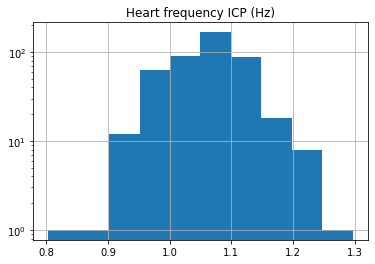

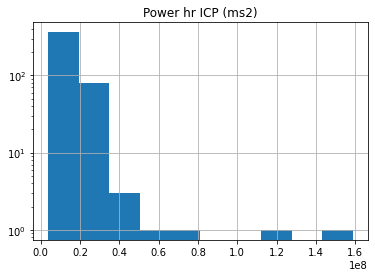

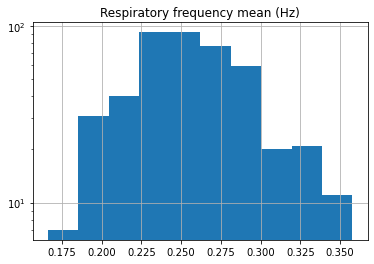

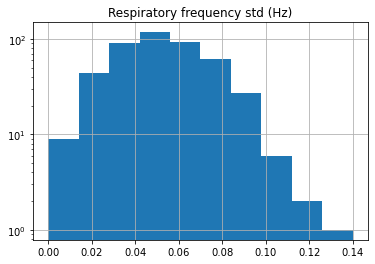

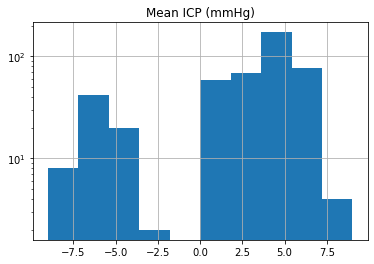

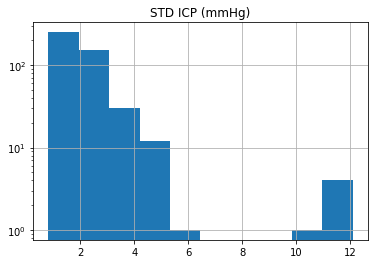

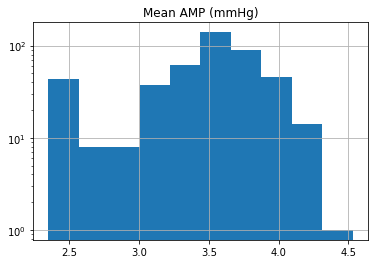

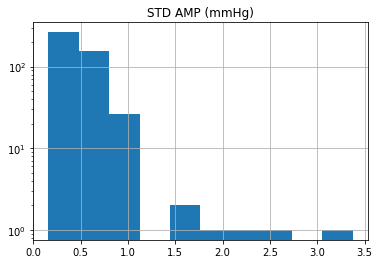

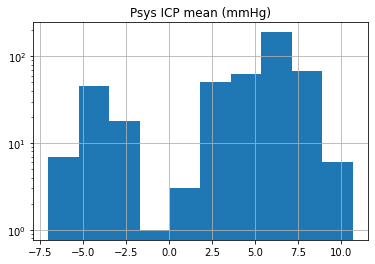

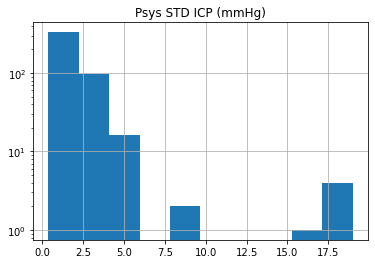

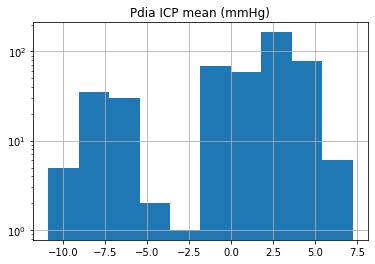

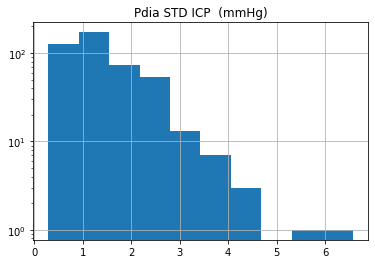

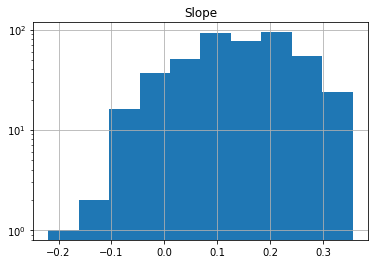

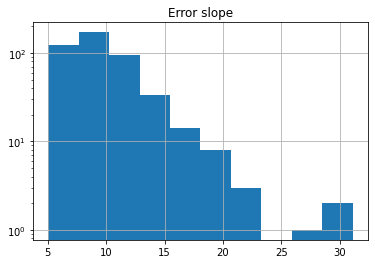

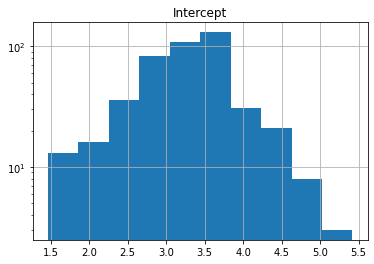

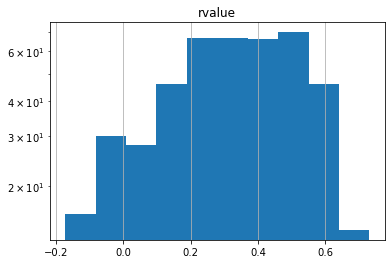

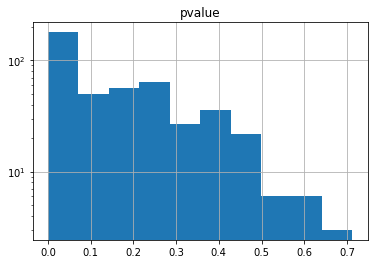

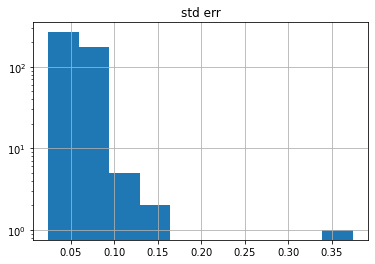

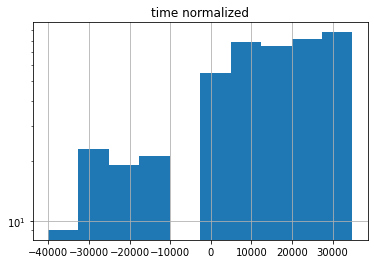

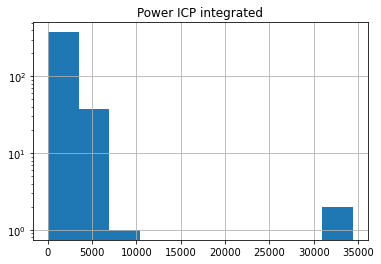

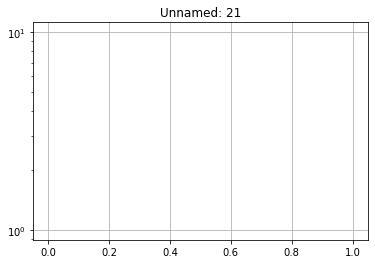

In [149]:
for var in variables :
    plt.figure()
    data[var][filt].hist()
    plt.yscale('log')
    plt.title(var)

Text(0.5, 1.0, 'Heart frequency ICP (Hz)')

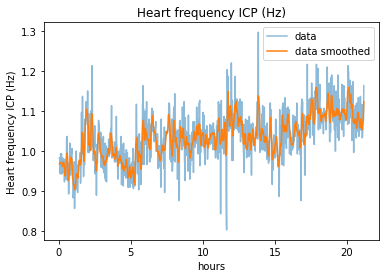

In [151]:
var='Heart frequency ICP (Hz)'
hr_smooth=signal.savgol_filter(data[var],window_length=15, polyorder=2)


plt.figure()
plt.plot(data['#time']/60/60,data[var], alpha=0.5,label='data')
plt.plot(data['#time']/60/60,hr_smooth, label='data smoothed')
plt.legend()
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)

Text(0.5, 1.0, 'Mean ICP (mmHg)')

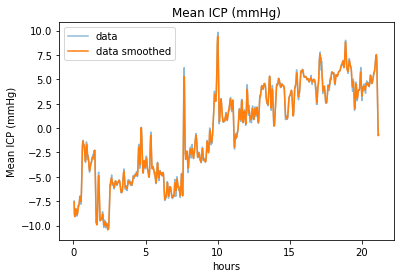

In [152]:
var='Mean ICP (mmHg)'
mean_smooth=signal.savgol_filter(data[var],window_length=15, polyorder=4)


plt.figure()
plt.plot(data['#time']/60/60,data[var], alpha=0.5,label='data')
plt.plot(data['#time']/60/60,mean_smooth, label='data smoothed')
plt.legend()
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)

Text(0.5, 1.0, 'Slope')

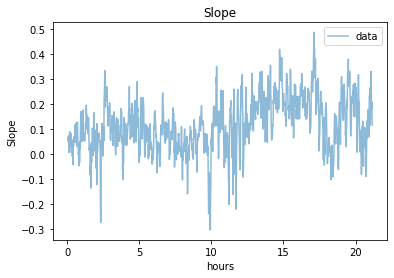

In [155]:
var='Slope'
#slope_smooth=signal.savgol_filter(data[var],window_length=15, polyorder=4)


plt.figure()
plt.plot(data['#time']/60/60,data[var], alpha=0.5,label='data')
#plt.plot(data['#time']/60/60,slope_smooth, label='data smoothed')
plt.legend()
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)

Text(0.5, 1.0, 'Intercept')

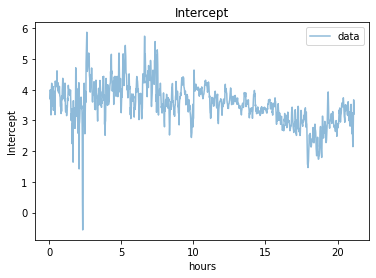

In [157]:
var='Intercept'
#icpt_smooth=signal.savgol_filter(data[var],window_length=15, polyorder=4)


plt.figure()
plt.plot(data['#time']/60/60,data[var], alpha=0.5,label='data')
#plt.plot(data['#time']/60/60,icpt_smooth, label='data smoothed')
plt.legend()
plt.xlabel('hours')
plt.ylabel(var)
plt.title(var)

### Respiratory frequency 

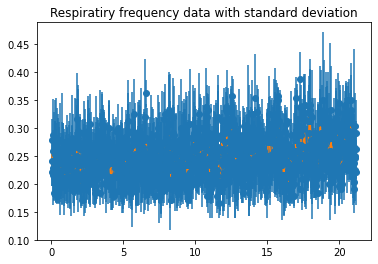

In [173]:
var='Respiratory frequency mean (Hz)'
plt.errorbar(data['#time']/3600, data[var], yerr=data['Respiratory frequency std (Hz)'], fmt="o")
plt.title('Respiratiry frequency data with standard deviation')
rf_smooth=signal.savgol_filter(data[var],window_length=15, polyorder=2)
plt.plot(data['#time']/60/60,rf_smooth, label='data smoothed')
plt.show()

### Slope + intercept

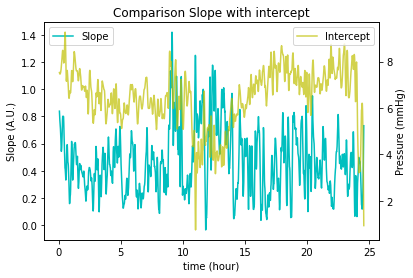

In [303]:
fig, ax = plt.subplots(1, 1)
ax.plot(data['#time']/3600, slope_smooth,'c', label='Slope')
plt.legend(loc='upper left')
ax2 = ax.twinx()
ax2.plot(data['#time']/3600,icpt_smooth,'y', label='Intercept', alpha=0.7)
ax.set_xlabel('time (hour)')
ax.set_ylabel('Slope (A.U.)')
ax2.set_ylabel('Pressure (mmHg)')
plt.legend(loc='upper right')
plt.title('Comparison Slope with intercept')
plt.draw()

### Comparison between the slope and the respiratory frequency 

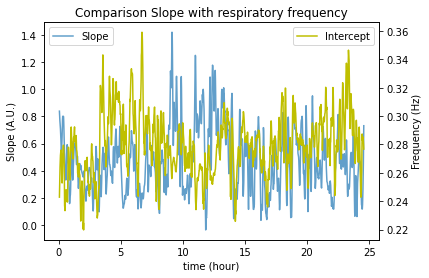

In [304]:
fig, ax = plt.subplots(1, 1)
ax.plot(data['#time']/3600, slope_smooth, label='Slope', alpha=0.7)
plt.legend(loc='upper left')
ax2 = ax.twinx()
ax2.plot(data['#time']/3600,rf_smooth,'y', label='Intercept')
ax.set_xlabel('time (hour)')
ax.set_ylabel('Slope (A.U.)')
ax2.set_ylabel('Frequency (Hz)')
plt.legend(loc='upper right')
plt.title('Comparison Slope with respiratory frequency')
plt.draw()

### Heart frequency and slope

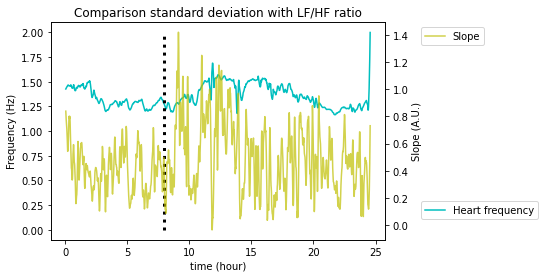

In [305]:
fig, ax = plt.subplots(1, 1)
ax.plot(data['#time']/3600, hr_smooth,'c', label='Heart frequency')
plt.legend(bbox_to_anchor=(1.09, 0.2), loc='upper left')
ax2 = ax.twinx()
ax2.plot(data['#time']/3600,slope_smooth,'y', label='Slope', alpha=0.7)
ax.set_xlabel('time (hour)')
ax.set_ylabel('Frequency (Hz)')
ax2.set_ylabel('Slope (A.U.)')
ax.plot([8,8],[0, 2],'k:',linewidth=3)
plt.legend(bbox_to_anchor=(1.09, 1.0), loc='upper left')
plt.title('Comparison standard deviation with LF/HF ratio')
plt.draw()

### Heart frequency and mean ICP 

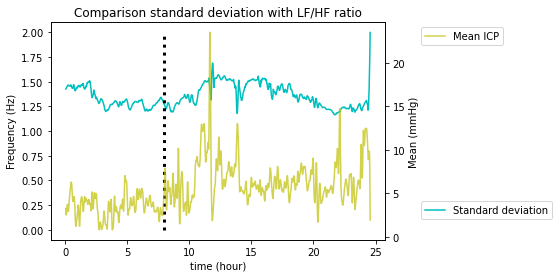

In [306]:
fig, ax = plt.subplots(1, 1)
ax.plot(data['#time']/3600, hr_smooth,'c', label='Standard deviation')
plt.legend(bbox_to_anchor=(1.09, 0.2), loc='upper left')
ax2 = ax.twinx()
ax2.plot(data['#time']/3600,mean_smooth,'y', label='Mean ICP', alpha=0.7)
ax.set_xlabel('time (hour)')
ax.set_ylabel('Frequency (Hz)')
ax2.set_ylabel('Mean (mmHg)')
ax.plot([8,8],[0, 2],'k:',linewidth=3)
plt.legend(bbox_to_anchor=(1.09, 1.0), loc='upper left')
plt.title('Comparison standard deviation with LF/HF ratio')
plt.draw()

### Periodograms

#### Mean ICP

Text(0.5, 1.0, 'Power of Mean ICP during 5 hours at -9.1825 hours')

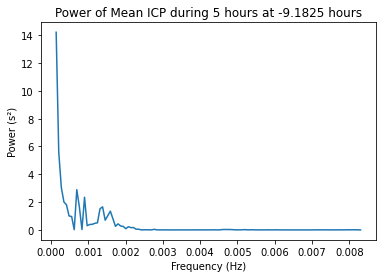

In [8]:
mini=2*3600
maxi=6*3600

index=np.where((data['#time']>=mini) & (data['#time']<=maxi))[0]
id_min=np.where(data['#time']>=mini)[0][0]
freq,power=da.periodogram(np.array(data['Mean ICP (mmHg)'][index]),np.array(data['#time'][index]))
plt.plot(freq[1:],power[1:])
#plt.ylim([0,20])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (s²)')
plt.title('Power of Mean ICP during 5 hours at '+str(data['time normalized'][id_min]/3600)+' hours')

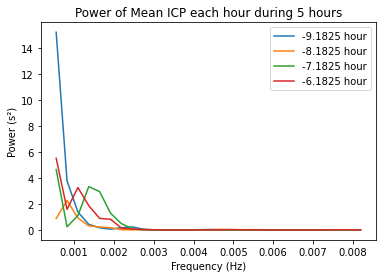

In [9]:
ti=2*3600
index=np.where((data['#time']>=mini) & (data['#time']<=maxi))[0]
while ti < 6*3600 : 
    indices=da.indexseq(ti,3600,data['#time'])
    
    if len(indices)>0:
        id_min=np.where(data['#time']>=ti)[0][0]
        freq,power=da.periodogram(np.array(data['Mean ICP (mmHg)'][indices]),np.array(data['#time'][indices]))
        plt.plot(freq[1:],power[1:], label=str(data['time normalized'][id_min]/3600)+' hour')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power (s²)')
        #plt.xlim([0,0.008])
        #plt.ylim([0,30])
        plt.title('Power of Mean ICP each hour during 5 hours')
        plt.legend()
    
    ti=ti+3600

Periodograms with filter on datas :

Text(0.5, 1.0, 'Power of Mean ICP during 5 hours at 4.8175 hours')

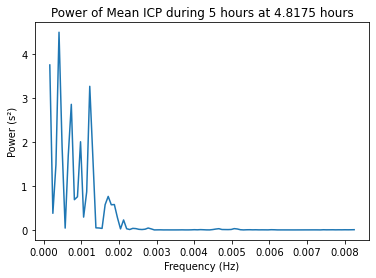

In [10]:
mini=16*3600
maxi=21*3600

index=np.where((data['#time'][filt]>=mini) & (data['#time'][filt]<=maxi))[0]
id_min=np.where(data['#time']>=mini)[0][0]
freq,power=da.periodogram(np.array(data['Mean ICP (mmHg)'][index]),np.array(data['#time'][index]))
plt.plot(freq[1:],power[1:])
#plt.ylim([0,20])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (s²)')
plt.title('Power of Mean ICP during 5 hours at '+str(data['time normalized'][id_min]/3600)+' hours')

Periodograms on data between 5 and 10 hours in a window of an hour.

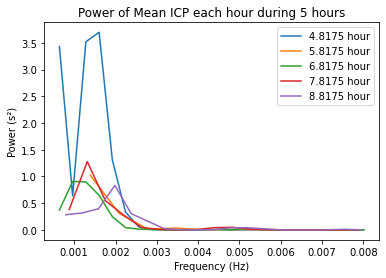

In [11]:
ti=16*3600

while ti < 21*3600 : 
    indices=da.indexseq(ti,3600,data['#time'][filt])
    
    if len(indices)>0:
        id_min=np.where(data['#time'][filt]>=ti)[0][0]
        freq,power=da.periodogram(np.array(data['Mean ICP (mmHg)'][indices]),np.array(data['#time'][indices]))
        plt.plot(freq[1:],power[1:], label=str(data['time normalized'][filt[id_min]]/3600)+' hour')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power (s²)')
        #plt.xlim([0,0.008])
        #plt.ylim([0,30])
        plt.title('Power of Mean ICP each hour during 5 hours')
        plt.legend()
    
    ti=ti+3600

We can notice changes around 0.00075 and 0.0012 Hz. Corresponding to 22 minutes and 14 minutes.

###### Spectrogram Mean ICP

##### With matplotlib function 

Text(0.5, 1.0, 'Spectrogram Mean ICP during all night')

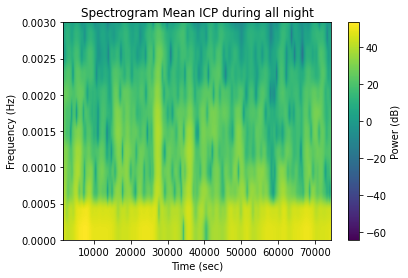

In [12]:
plt.figure()
plt.specgram(np.array(data['Mean ICP (mmHg)']),NFFT=60,Fs=1/60, noverlap=59,mode='psd')
plt.colorbar(label='Power (dB)')
plt.ylim([0,0.003])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.title('Spectrogram Mean ICP during all night')

##### With my function

See function spectrogram in library datanalysis.

(0.00055, 0.003)

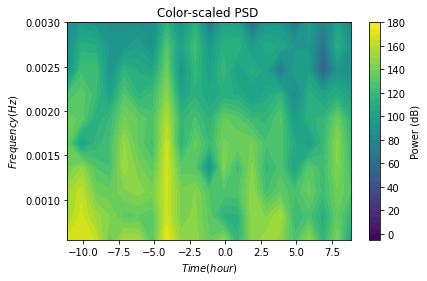

In [13]:
ti=data['#time'][0]
power_res=[]
time_res=[]
time_norm=[]
while ti<data['#time'][len(data['#time'])-1]-3600:
    indices=da.indexseq(ti,3600,data['#time'])
    id_min=np.where(data['#time']>=ti)[0][0]
    freq,power=da.periodogram(np.array(data['Mean ICP (mmHg)'][indices]),np.array(data['#time'][indices]))
    if np.size(power_res)==0:
        power_res=power
    else:
        power_res=np.c_[power_res,power]
    
    time_res.append(ti/3600)
    time_norm.append(data['time normalized'][indices[0]]/3600)
    ti=ti+3600
    
fig=plt.figure(figsize=[14,4])
ax = fig.add_subplot(122)
cf = ax.contourf(time_norm,freq[1:],10*np.log(power_res[:][1:]*1e6),40,cmap='viridis')
cbar = fig.colorbar(cf, label='Power (dB)')
cbar.update_ticks()

ax.set_xlabel(r'$Time (hour)$')
ax.set_ylabel(r'$Frequency (Hz)$')
ax.set_aspect('auto')
plt.title('Color-scaled PSD ')
plt.ylim([0.00055,0.003])

Let's test the function.

(0.00055, 0.003)

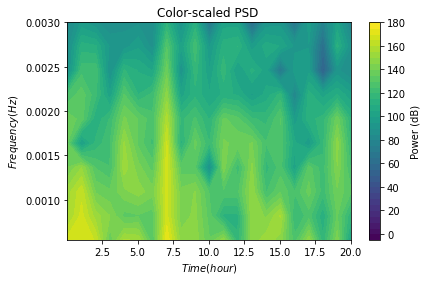

In [17]:
da.spectrogram(np.array(data['#time']),np.array(data['Mean ICP (mmHg)']),3600)
plt.ylim([0.00055,0.003])

#### Mean amplitude

Let visualize some peiodograms and spectorgrams of the amplitude mean with removing of the continuous component.

Text(0.5, 1.0, 'Power of Mean amplitude during 5 hours')

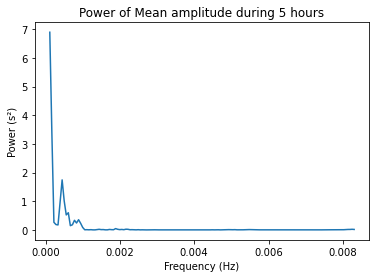

In [24]:
mini=15*3600
maxi=20*3600
index=np.where((data['#time']>=mini) & (data['#time']<=maxi))[0]
freq,power=da.periodogram(np.array(data['Mean AMP (mmHg)'][index]),np.array(data['#time'][index]))
plt.plot(freq[1:],power[1:])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (s²)')
plt.title('Power of Mean amplitude during 5 hours')

In [25]:
print('Total power (ms²)',ha.power_frequency_band(freq, power, 0.0, 0.008))

Total power (ms²) 7512.257992843711


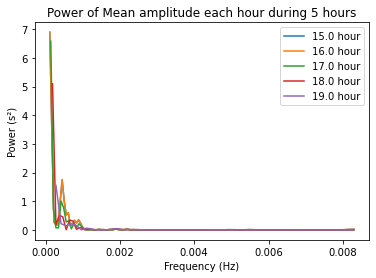

In [26]:
index=np.where((data['#time']>=mini) & (data['#time']<=maxi))[0]
ti=15*3600
while ti < 20*3600 : 
    indices=da.indexseq(3600,data['#time'][index],ti)
    freq,power=da.periodogram(np.array(data['Mean AMP (mmHg)'][index[indices]]),np.array(data['#time'][index[indices]]))
    plt.plot(freq[1:],power[1:], label=str(ti/3600)+' hour')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power (s²)')
    #plt.xlim([0.003,0.008])
    plt.title('Power of Mean amplitude each hour during 5 hours')
    plt.legend()
    
    ti=ti+3600

##### Spectrogram Mean amplitude

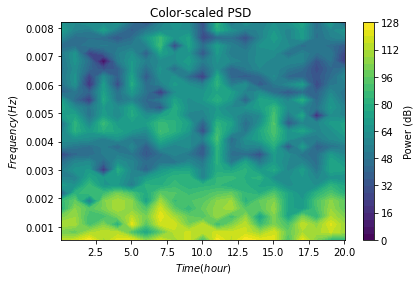

In [31]:
t,f,p=da.spectrogram(np.array(data['#time']),np.array(data['Mean AMP (mmHg)']),time_window=3600)

### Slope

#### Periodogram

Text(0.5, 1.0, 'Power of slope during all night')

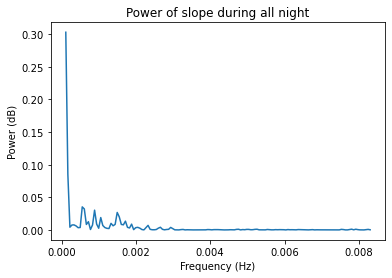

In [41]:
mini=16*3600
maxi=21*3600
index=np.where((data['#time']>=mini) & (data['#time']<=maxi))[0]
freq,power=da.periodogram(np.array(data['Slope'][index]),np.array(data['#time'][index]))
plt.plot(freq[1:],power[1:])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.title('Power of slope during all night')

#### Spectrogram

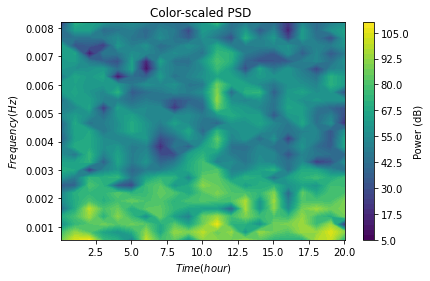

In [38]:
t,f,p=da.spectrogram(np.array(data['#time']),np.array(data['Slope']),time_window=3600)